In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import json
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

In [212]:
solo_living = pd.read_csv('wards_household_data.csv')

In [213]:
solo_living.head()

,Region code,Region name,County code,County name,Local authority code,Local authority name,Ward code,Ward name,Unnamed: 8,Persons,Persons.1,Persons.2,Unnamed: 12,Hectares,Persons per hectare,Unnamed: 15,Households,Persons per household
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All usual residents,Household residents,Communal establishment residents,NaN,Area,Population density,NaN,Households with at least one usual resident,Average household size
1,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007955,Annfield Plain,NaN,"7,774","7,717",57,NaN,799,9.7,NaN,"3,522",2.2
2,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007956,Aycliffe East,NaN,"6,280","6,234",46,NaN,"1,336",4.7,NaN,"2,787",2.2
3,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007957,Aycliffe North,NaN,"7,751","7,611",140,NaN,337,23,NaN,"3,271",2.3
4,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007958,Aycliffe West,NaN,"7,457","7,457",0,NaN,288,25.9,NaN,"3,335",2.2


In [214]:
solo_living = solo_living.drop(solo_living.index[0])
solo_living.head()
solo_living['Persons per household'] = solo_living['Persons per household'].astype('float32')

In [215]:
len(solo_living)

8570

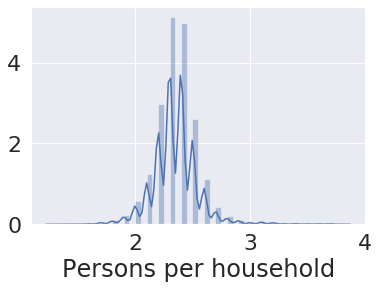

In [216]:
sns.distplot(solo_living['Persons per household'])

In [217]:
household_size = solo_living[['Ward code','Persons per household']].dropna()

In [218]:
data = pd.read_csv('All_data_aggregated_ward_level.csv')

In [219]:
list(data.columns)

['Unnamed: 0',
 'Unnamed: 0_x',
 'green_score',
 'GSS_CODE',
 'WD17CD',
 'GLUD_Area of Greenspace PCT',
 'LCM_grass_pct',
 'LCM_tree_pct',
 'LCM_urban_pct',
 'UA_Public Greenery PCT',
 'UA_Forests PCT',
 'StreetTrees_PCT',
 'Unnamed: 0.1',
 'borough_name_x',
 'poly',
 'area_m',
 'area_km',
 'gsview_point_list',
 'gsview_segnet_tags_dict',
 'gsview_tags',
 'total_gsview_pixels',
 'Tree',
 'TreeTotal',
 'TreeScore',
 'psoriasis_Prescriptions',
 'psoriasis_Prevalence',
 "Meniere's disease_Prescriptions",
 "Meniere's disease_Prevalence",
 "crohn's disease_Prescriptions",
 "crohn's disease_Prevalence",
 'gastroparesis_Prescriptions',
 'gastroparesis_Prevalence',
 'irritable bowel syndrome_Prescriptions',
 'irritable bowel syndrome_Prevalence',
 'parkinson_Prescriptions',
 'parkinson_Prevalence',
 'sleep apnea_Prescriptions',
 'sleep apnea_Prevalence',
 'interstitial cystitis_Prescriptions',
 'interstitial cystitis_Prevalence',
 'bipolar_Prescriptions',
 'bipolar_Prevalence',
 'hypothyroidis

In [220]:
df = pd.read_csv('Jan_clubcard2nutrients.csv.bz2', compression='bz2', header=0, sep=',', quotechar='"')

In [270]:
thresh_bottom_weight = np.mean(df['weight']) - 2*np.std(df['weight'])
thresh_top_weight = np.mean(df['weight']) + 2*np.std(df['weight'])

In [271]:
# test = df[ (df['weight'] < 600) & (df['quantity'] < 100) & (df['weight'] > 100) ]
test = df[ (df['weight'] < thresh_top_weight) & (df['weight'] > thresh_bottom_weight) ]

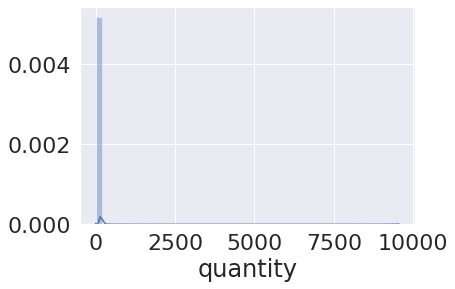

In [272]:
sns.distplot(test['quantity'])

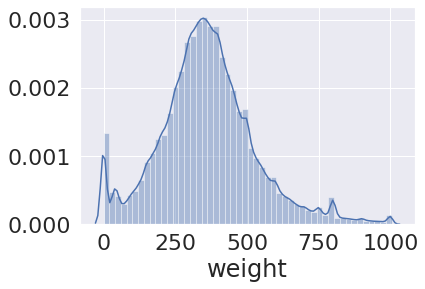

In [273]:
sns.distplot(test['weight'])

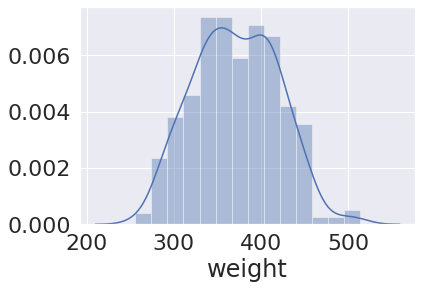

In [274]:
sns.distplot(data['weight'])

In [275]:
list(df.columns)

['pcd',
 'lat',
 'long',
 'oa11',
 'lsoa11',
 'msoa11',
 'osward',
 'oslaua',
 'clubcard_number',
 'weight',
 'volume',
 'energy_on_label',
 'g_fat',
 'g_saturate',
 'g_salt',
 'g_sugar',
 'g_protein',
 'g_carb',
 'g_fibre',
 'g_alcohol',
 'energy_fat',
 'energy_saturate',
 'energy_sugar',
 'energy_protein',
 'energy_carb',
 'energy_fibre',
 'energy_alcohol',
 'energy_tot',
 'f_energy_fat',
 'f_energy_saturate',
 'f_energy_sugar',
 'f_energy_protein',
 'f_energy_carb',
 'f_energy_fibre',
 'f_energy_alcohol',
 'hdi_fat',
 'hdi_saturate',
 'hdi_carb',
 'hdi_protein',
 'hdi_sugar',
 'energy_density',
 'h_nutrients_weight',
 'h_nutrients_weight_norm',
 'h_nutrients_calories',
 'h_nutrients_calories_norm',
 'beer_items',
 'dairy_items',
 'eggs_items',
 'fats_oils_items',
 'fish_items',
 'fruit_veg_items',
 'grains_items',
 'meat_red_items',
 'poultry_items',
 'readymade_items',
 'sauces_items',
 'soft_drinks_items',
 'spirits_items',
 'sweets_items',
 'tea_coffee_items',
 'water_items',
 'w

In [276]:
# household_individual = {'CardID':[] , 'WardCode': []  , 'h_nutrients_calories_norm' :[] , 'weight' : [] , 'volume':[]}
# for name, group in df.groupby('clubcard_number'):
#     household_individual['CardID'].append(name)
#     household_individual['WardCode'].append(group.iloc[0]['osward'])
#     household_individual['h_nutrients_calories_norm'].append(np.sum(group['h_nutrients_calories_norm']))
#     household_individual['weight'].append(np.sum(group['weight']))
#     household_individual['volume'].append(np.sum(group['volume']))
# Tesco = pd.Dataframe.from_dict(household_individual)
   

In [317]:
Tesco = test[['clubcard_number','h_nutrients_calories_norm', 'weight' , 'volume','osward','f_energy_alcohol' , 'h_items_norm' , 'h_items_weight_norm']].copy()
Tesco = Tesco.dropna()
features_to_normalize = ['h_nutrients_calories_norm', 'weight','f_energy_alcohol','h_items_norm','h_items_weight_norm']
Tesco[features_to_normalize] = Tesco[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [318]:
# Tesco['Household'] =  0.7283  + 0.26*Tesco['weight'] - 0.65*Tesco['h_nutrients_calories_norm']
# Tesco['Household'] =  3.2294 + 0.5422*Tesco['weight'] -1.3654*Tesco['h_nutrients_calories_norm']
# Tesco['Household'] =  3.2294 + 0.5422*Tesco['weight'] -1.3654*Tesco['h_nutrients_calories_norm']
Tesco['Household'] =  0.7344 - 0.4772*Tesco['f_energy_alcohol'] + 0.4570*Tesco['h_items_norm'] -0.6621*Tesco['h_items_weight_norm']

In [319]:
Tesco['Household']

0         0.544493
1         0.753099
2         0.581637
3         0.734400
4         0.659287
            ...   
886979    0.734400
886980    0.617308
886981    0.751957
886982    0.573267
886983    0.734400
Name: Household, Length: 871860, dtype: float64

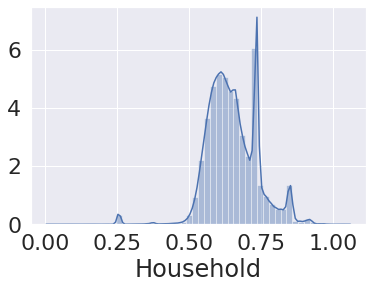

In [320]:
sns.distplot(Tesco['Household'])

In [328]:
Thresh  = 0.5 +  0.2 * (np.max(Tesco['Household']) - 0.5)
print(Thresh)

0.6085370958300695


In [329]:
def solo(x):
    if x<= Thresh:
        return 1
    else:
        return 0 
Tesco['solo'] = Tesco['Household'].apply(lambda x: solo(x))

In [330]:
np.sum(Tesco['solo'])

289140

In [331]:
Ward_level_estimate = {'WardCode':[] , 'Household':[]}
for name , group in Tesco.groupby('osward'):
    Ward_level_estimate['WardCode'].append(name)
    soloHouses = np.sum(group['solo'])
    fraction = float(soloHouses)/ len(group)
    Ward_level_estimate['Household'].append(fraction)
Ward_estimates = pd.DataFrame.from_dict(Ward_level_estimate)

In [332]:
len(Ward_estimates)

658

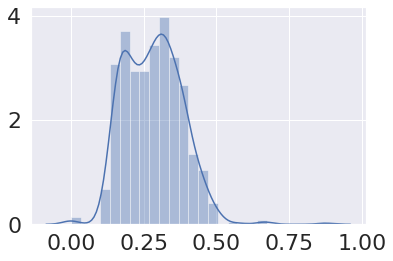

In [333]:
sns.distplot(Ward_level_estimate['Household'])

In [335]:
%store Ward_estimates

Stored 'Ward_estimates' (DataFrame)


In [300]:
solo_gt = solo_living[['Ward code','Persons per household']]

In [301]:
len(solo_gt)

8570

In [302]:
merged = pd.merge(solo_gt , Ward_estimates, left_on='Ward code', right_on='WardCode')

In [303]:
merged

,Ward code,Persons per household,WardCode,Household
0,E05000128,2.1,E05000128,2.559762
1,E05000129,1.8,E05000129,2.594899
2,E05000130,2.1,E05000130,2.589734
3,E05000131,2.2,E05000131,2.553603
4,E05000132,2.2,E05000132,2.553098
...,...,...,...,...
479,E05000606,2.8,E05000606,2.598908
480,E05000607,2.6,E05000607,2.593045
481,E05000608,2.7,E05000608,2.574907
482,E05000609,2.5,E05000609,2.587414


In [304]:
features_to_normalize = ['Persons per household']
# merged[features_to_normalize] = merged[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

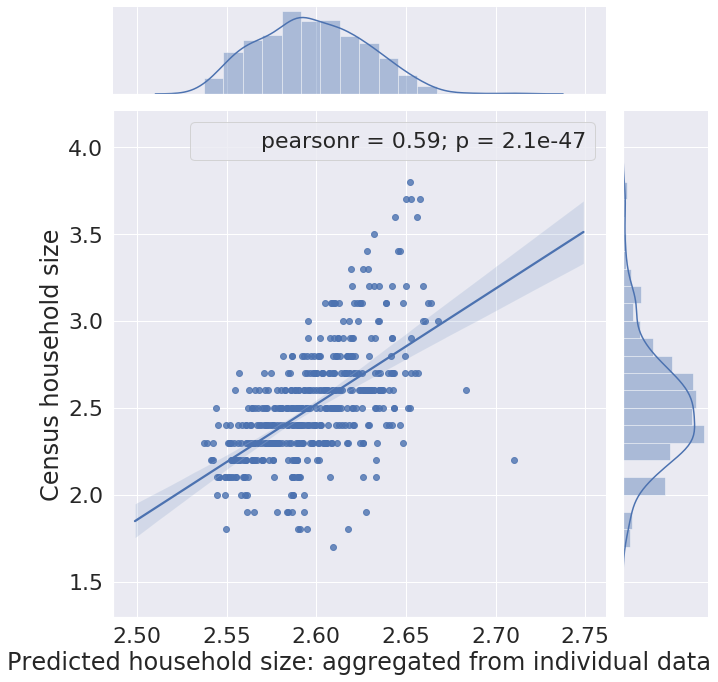

In [305]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=merged['Household'], y=merged['Persons per household'], kind='regression',height=10);
plt.xlabel('Predicted household size: aggregated from individual data')
plt.ylabel('Census household size')
ax.annotate(pearsonr)

In [306]:
Ward_level_solo_estimate = {'WardCode':[] , 'Solo_fraction':[]}
for name , group in Tesco.groupby('osward'):
    Ward_level_solo_estimate['WardCode'].append(name)
    solo = len(group[group['Household'] < 2.0])
    all_household = len(group)
    Ward_level_solo_estimate['Solo_fraction'].append(float(solo)/float(all_household))
Ward_estimates_solo = pd.DataFrame.from_dict(Ward_level_solo_estimate)

In [307]:
Ward_estimates_solo

,WardCode,Solo_fraction
0,E05000026,0.0
1,E05000027,0.0
2,E05000028,0.0
3,E05000029,0.0
4,E05000030,0.0
...,...,...
653,E05011485,0.0
654,E05011486,0.0
655,E05011487,0.0
656,E05011488,0.0


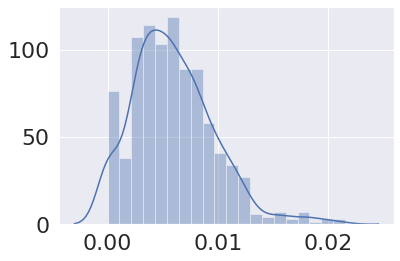

In [291]:
sns.distplot(Ward_level_solo_estimate['Solo_fraction'])